<a href="https://colab.research.google.com/github/kanishka-9872/Image-classification/blob/main/image_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/"MyDrive"/archive.zip

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [8]:
(x_train , y_train) , (x_test , y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_test.shape

(10000, 1)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [43]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

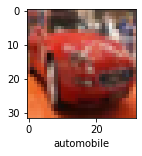

In [44]:
plot_sample(x_train,y_train, 5)

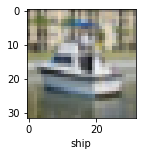

In [45]:
plot_sample(x_train,y_train, 501)

In [20]:
x_train=x_train/255.0
x_test=x_test/255.0

In [21]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=1)

1563/1563 [==============================] - 116s 73ms/step - loss: 1.8079 - accuracy: 0.3558


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification report : /n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 9s 28ms/step
classification report : /n               precision    recall  f1-score   support

           0       0.43      0.57      0.49      1000
           1       0.53      0.45      0.49      1000
           2       0.39      0.18      0.25      1000
           3       0.26      0.49      0.34      1000
           4       0.43      0.32      0.37      1000
           5       0.41      0.26      0.32      1000
           6       0.49      0.42      0.45      1000
           7       0.37      0.54      0.44      1000
           8       0.71      0.28      0.40      1000
           9       0.43      0.59      0.50      1000

    accuracy                           0.41     10000
   macro avg       0.45      0.41      0.40     10000
weighted avg       0.45      0.41      0.40     10000



In [23]:
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

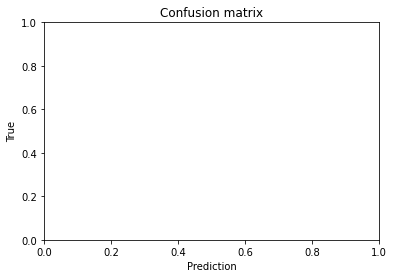

In [24]:
plt.ylabel('True')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [26]:
cnn=models.Sequential([
    
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [28]:
cnn.compile(optimizer='adam',
                      loss= 'sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [29]:
cnn.fit(x_train,y_train,epochs=1)

1563/1563 [==============================] - 76s 48ms/step - loss: 1.4415 - accuracy: 0.4822


In [30]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.1786 - accuracy: 0.5892


[1.1786065101623535, 0.5892000198364258]

In [31]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[8.48047808e-03, 1.86111240e-04, 1.06076702e-01, 3.78027380e-01,
        6.52376795e-03, 4.49678957e-01, 2.99101174e-02, 1.21485153e-02,
        5.61814616e-03, 3.34991771e-03],
       [2.92592824e-01, 3.29091311e-01, 1.13895559e-03, 4.83451076e-05,
        5.78527164e-04, 1.33270205e-05, 7.42056864e-06, 1.52613531e-04,
        2.30218276e-01, 1.46158323e-01],
       [2.63107657e-01, 2.21870631e-01, 1.72434412e-02, 1.49439257e-02,
        9.92014259e-03, 4.68039885e-03, 1.06969546e-03, 8.31398182e-03,
        3.71110827e-01, 8.77393708e-02],
       [6.63771868e-01, 4.30737622e-02, 1.14324102e-02, 7.67649501e-04,
        5.74004976e-03, 1.42638659e-04, 1.96152861e-04, 6.74439187e-04,
        2.68318802e-01, 5.88217331e-03],
       [2.01318786e-03, 1.13104435e-03, 1.82115212e-01, 4.61437702e-02,
        3.02880824e-01, 5.35686649e-02, 4.02968943e-01, 7.84432981e-03,
        3.68804234e-04, 9.65053332e-04]], dtype=float32)

In [32]:
y_classes=[np.argmax(element) for element in y_pred]

In [33]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
plot_sample(x_test,y_test,5)